In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
# Any results you write to the current directory are saved as output.

/kaggle/input/ph-recognition/ph-data.csv


In [2]:
phs = pd.read_csv('/kaggle/input/ph-recognition/ph-data.csv')
ph = phs.copy()

In [3]:
ph.describe()

,blue,green,red,label
count,653.000000,653.000000,653.000000,653.000000
mean,89.290965,130.094946,120.655436,7.055130
std,74.974850,72.487085,89.581264,4.287951
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,68.000000,52.000000,3.000000
50%,67.000000,146.000000,90.000000,7.000000
75%,162.000000,189.000000,224.000000,11.000000
max,255.000000,255.000000,255.000000,14.000000


In [4]:
ph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 4 columns):
blue     653 non-null int64
green    653 non-null int64
red      653 non-null int64
label    653 non-null int64
dtypes: int64(4)
memory usage: 20.5 KB


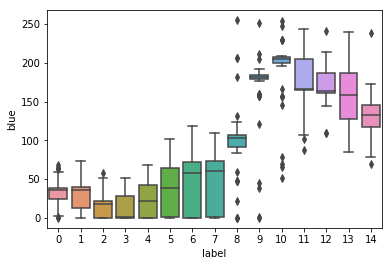

In [5]:
sns.boxplot('label','blue',data=ph)

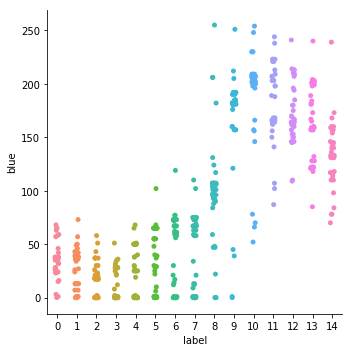

In [6]:
sns.catplot('label','blue',data=ph)

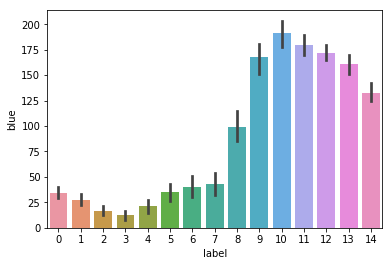

In [7]:
sns.barplot('label','blue',data=ph)

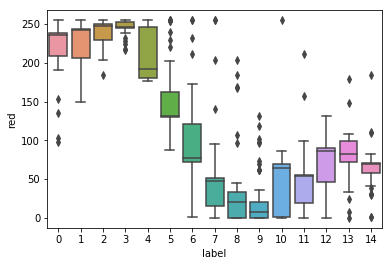

In [8]:
sns.boxplot('label','red',data=ph)

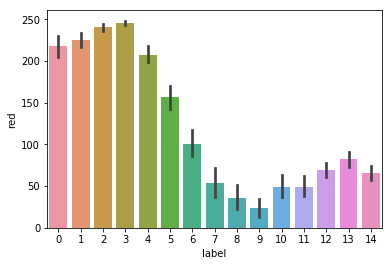

In [9]:
sns.barplot('label','red',data=ph)

In [10]:
corr = ph.corr()

In [11]:
print(corr)

           blue     green       red     label
blue   1.000000 -0.323993 -0.667577  0.777602
green -0.323993  1.000000  0.107181 -0.281357
red   -0.667577  0.107181  1.000000 -0.751137
label  0.777602 -0.281357 -0.751137  1.000000


In [12]:
#sns.pairplot(ph,palette='set2')

In [13]:
ph['label']=ph['label'].astype('object')

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
from sklearn.model_selection import train_test_split

x = ph[['blue','green','red']]
y = ph['label']

In [16]:
y = y.astype('int64')

In [17]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [18]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import cross_val_predict

rfm = RandomForestClassifier(max_features=0.2,criterion='entropy',n_estimators=2000,warm_start=True,bootstrap=True)
rfm.fit(X_train,y_train)

rfm_pred = cross_val_predict(rfm,X_train,y_train,cv=10)
rfm_acc = accuracy_score(y_train,rfm_pred)

print(rfm_acc)
y_pred = rfm.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.7658643326039387
0.7551020408163265
